In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
batch_size = 64
img_height = 224
img_width = 224

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Data_Soil/dataset/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 33111 files belonging to 41 classes.
Using 26489 files for training.


In [4]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Data_Soil/dataset/test',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8339 files belonging to 41 classes.
Using 1667 files for validation.


In [5]:
VGG = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [6]:
VGG.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [7]:
VGG.trainable = False

In [8]:
model = keras.Sequential([
      VGG,
      keras.layers.Flatten(),
      keras.layers.Dense(units = 256, activation = "relu"),
      keras.layers.Dense(units = 256, activation = "relu"),      
      keras.layers.Dense(units = 41, activation = "softmax"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 41)                10537     
                                                                 
Total params: 21,213,801
Trainable params: 6,499,113
Non-trainable params: 14,714,688
_________________________________________________________________


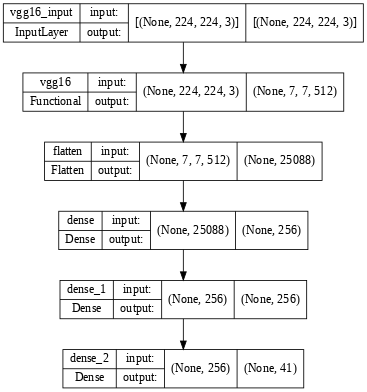

In [9]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested = False, dpi=60)

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=test_ds,
  verbose=1,
  epochs=epochs
)

Epoch 1/50
414/414 [==============================] - 3871s 9s/step - loss: 1.4320 - accuracy: 0.7842 - val_loss: 0.5024 - val_accuracy: 0.8602
Epoch 2/50
414/414 [==============================] - 251s 602ms/step - loss: 0.3199 - accuracy: 0.9205 - val_loss: 0.6007 - val_accuracy: 0.8854
Epoch 3/50
414/414 [==============================] - 251s 602ms/step - loss: 0.2540 - accuracy: 0.9447 - val_loss: 0.9691 - val_accuracy: 0.8536
Epoch 4/50
414/414 [==============================] - 251s 603ms/step - loss: 0.2265 - accuracy: 0.9535 - val_loss: 0.9426 - val_accuracy: 0.8800
Epoch 5/50
414/414 [==============================] - 250s 601ms/step - loss: 0.1928 - accuracy: 0.9633 - val_loss: 0.6559 - val_accuracy: 0.9106
Epoch 6/50
414/414 [==============================] - 250s 601ms/step - loss: 0.1593 - accuracy: 0.9683 - val_loss: 0.8562 - val_accuracy: 0.8986
Epoch 7/50
414/414 [==============================] - 251s 602ms/step - loss: 0.1251 - accuracy: 0.9758 - val_loss: 0.8042 - v

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/VGG16_Plant_Model_Updatedjkn.hdf5')